In [1]:
import yfinance as yf
from typing import Optional
from matplotlib import pyplot as plt

import jax
from jax import numpy as jnp
from jax.typing import ArrayLike

from matplotlib import pyplot as plt
import nifty8.re as jft

from functools import partial

In [2]:
import sys
import os
import pathlib

curr_path = pathlib.Path(os.getcwd())
mod_path = curr_path / "./signals_class"
sys.path.insert(0, str(mod_path))
from sg_class.signal_classes import SignalResponse, FixedPowerCorrelatedField

SEED = 42

In [3]:
tickers_us = yf.Ticker("^GSPC")
tickers_eu = yf.Ticker("^FTSE")

snp_data = tickers_us.history(period="5y", interval="1d")
ftse_data = tickers_eu.history(period="5y", interval="1d")

In [4]:
snp_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-26 00:00:00-04:00,2985.729980,2987.280029,2963.709961,2977.620117,3084910000,0.0,0.0
2019-09-27 00:00:00-04:00,2985.469971,2987.310059,2945.530029,2961.790039,3246480000,0.0,0.0
2019-09-30 00:00:00-04:00,2967.070068,2983.850098,2967.070068,2976.739990,3249130000,0.0,0.0
2019-10-01 00:00:00-04:00,2983.689941,2992.530029,2938.699951,2940.250000,3560750000,0.0,0.0
2019-10-02 00:00:00-04:00,2924.780029,2924.780029,2874.929932,2887.610107,3914180000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,0.0,0.0
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,0.0,0.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0


In [5]:
ftse_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-26 00:00:00+01:00,7290.000000,7387.100098,7277.200195,7351.100098,704707500,0.0,0.0
2019-09-27 00:00:00+01:00,7351.100098,7440.799805,7351.000000,7426.200195,584318800,0.0,0.0
2019-09-30 00:00:00+01:00,7426.200195,7439.600098,7402.200195,7408.200195,655556100,0.0,0.0
2019-10-01 00:00:00+01:00,7408.200195,7433.200195,7352.799805,7360.299805,734563400,0.0,0.0
2019-10-02 00:00:00+01:00,7360.299805,7360.299805,7119.700195,7122.500000,747799600,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-20 00:00:00+01:00,8328.700195,8328.700195,8223.799805,8230.000000,1575731600,0.0,0.0
2024-09-23 00:00:00+01:00,8230.000000,8262.500000,8210.099609,8259.700195,653474700,0.0,0.0
2024-09-24 00:00:00+01:00,8259.700195,8309.799805,8259.500000,8282.799805,1018907500,0.0,0.0


In [6]:
snp_data.shape, ftse_data.shape

((1258, 7), (1262, 7))

In [7]:
idx_list = [i for i in snp_data.index.date if i in ftse_data.index.date]
len(idx_list)

1231

In [8]:
snp_data.index = snp_data.index.date
snp_data = snp_data.loc[idx_list]
snp_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-09-26,2985.729980,2987.280029,2963.709961,2977.620117,3084910000,0.0,0.0
2019-09-27,2985.469971,2987.310059,2945.530029,2961.790039,3246480000,0.0,0.0
2019-09-30,2967.070068,2983.850098,2967.070068,2976.739990,3249130000,0.0,0.0
2019-10-01,2983.689941,2992.530029,2938.699951,2940.250000,3560750000,0.0,0.0
2019-10-02,2924.780029,2924.780029,2874.929932,2887.610107,3914180000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-19,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,0.0,0.0
2024-09-20,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,0.0,0.0
2024-09-23,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0
2024-09-24,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0


In [9]:
ftse_data.index = ftse_data.index.date
ftse_data = ftse_data.loc[idx_list]
ftse_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-09-26,7290.000000,7387.100098,7277.200195,7351.100098,704707500,0.0,0.0
2019-09-27,7351.100098,7440.799805,7351.000000,7426.200195,584318800,0.0,0.0
2019-09-30,7426.200195,7439.600098,7402.200195,7408.200195,655556100,0.0,0.0
2019-10-01,7408.200195,7433.200195,7352.799805,7360.299805,734563400,0.0,0.0
2019-10-02,7360.299805,7360.299805,7119.700195,7122.500000,747799600,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-19,8253.700195,8370.500000,8253.700195,8328.700195,861254500,0.0,0.0
2024-09-20,8328.700195,8328.700195,8223.799805,8230.000000,1575731600,0.0,0.0
2024-09-23,8230.000000,8262.500000,8210.099609,8259.700195,653474700,0.0,0.0
2024-09-24,8259.700195,8309.799805,8259.500000,8282.799805,1018907500,0.0,0.0


In [10]:
data = snp_data["High"]
target = snp_data["High"]

# Project overview

 - Calculate autocorrelation for different dt
 - predict future stocks absed on corr

## Sample code

In [11]:
key = jax.random.PRNGKey(SEED)
dims = (128, 128)

cf_zm = dict(offset_mean=0.0, offset_std=(1e-3, 1e-4))
cf_fl = dict(
    fluctuations=(1e-1, 5e-3),
    loglogavgslope=(-5.0, 1e-2),
    flexibility=(1e0, 5e-1),
    asperity=(5e-1, 5e-2),
)
cfm = jft.CorrelatedFieldMaker("cf")
cfm.set_amplitude_total_offset(**cf_zm)
cfm.add_fluctuations(
    dims, distances=1.0 / dims[0], **cf_fl, prefix="ax1", non_parametric_kind="power"
)
correlated_field = cfm.finalize()

scaling = jft.LogNormalPrior(3.0, 1.0, name="scaling", shape=(1,))

In [12]:
class Signal(jft.Model):
    def __init__(self, correlated_field, scaling):
        self.cf = correlated_field
        self.scaling = scaling
        # Init methods of the Correlated Field model and any prior model in
        # NIFTy.re are aware that their input is standard normal a priori.
        # The `domain` of a model does not know this. Thus, tracking the `init`
        # methods should be preferred over tracking the `domain`.
        super().__init__(init=self.cf.init | self.scaling.init)

    def __call__(self, x):
        # NOTE, think of `Model` as being just a plain function that takes some
        # input and performs all the necessary computation for your model.
        # Note, `scaling` here is completely degenarate with `offset_std` in the
        # likelihood but the priors for them are very different.
        return self.scaling(x) * jnp.exp(self.cf(x))


signal = Signal(correlated_field, scaling)

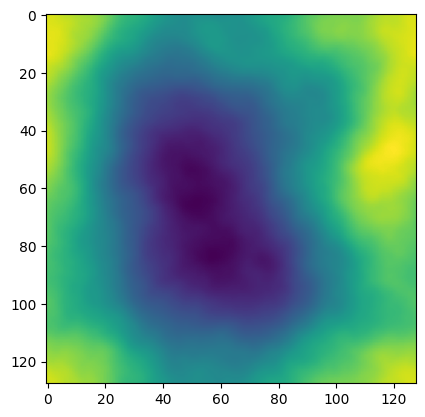

In [13]:
key, subkey = jax.random.split(key)
rand_pos = jft.random_like(subkey, signal.domain)

out_field = signal(rand_pos)

plt.imshow(out_field)

In [14]:
signal.domain

{'cfax1asperity': ShapeDtypeStruct(shape=(), dtype=float64),
 'cfax1flexibility': ShapeDtypeStruct(shape=(), dtype=float64),
 'cfax1fluctuations': ShapeDtypeStruct(shape=(), dtype=float64),
 'cfax1loglogavgslope': ShapeDtypeStruct(shape=(), dtype=float64),
 'cfax1spectrum': ShapeDtypeStruct(shape=(1619, 2), dtype=float64),
 'cfxi': ShapeDtypeStruct(shape=(128, 128), dtype=float64),
 'cfzeromode': ShapeDtypeStruct(shape=(), dtype=float64),
 'scaling': ShapeDtypeStruct(shape=(1,), dtype=float64)}

In [15]:
# def matern_kernel(distance, scale=1., cutoff=1., dof=1.5):
#     if dof == 0.5:
#         cov = scale**2 * jnp.exp(-distance / cutoff)
#     elif dof == 1.5:
#         reg_dist = jnp.sqrt(3) * distance / cutoff
#         cov = scale**2 * (1 + reg_dist) * jnp.exp(-reg_dist)
#     elif dof == 2.5:
#         reg_dist = jnp.sqrt(5) * distance / cutoff
#         cov = scale**2 * (1 + reg_dist + reg_dist**2 / 3) * jnp.exp(-reg_dist)
#     else:
#         raise NotImplementedError()
#     # NOTE, this is not safe for differentiating because `cov` still may
#     # contain NaNs
#     return jnp.where(distance < 1e-8 * cutoff, scale**2, cov)

# def rg2cart(x, idx0, scl):
#     """Transforms regular, points from a Euclidean space to irregular points in
#     an cartesian coordinate system in 1D."""
#     return jnp.exp(scl * x[0] + idx0)[jnp.newaxis, ...]

# def cart2rg(x, idx0, scl):
#     """Inverse of `rg2cart`."""
#     return ((jnp.log(x[0]) - idx0) / scl)[jnp.newaxis, ...]

# # cc = jft.HEALPixChart(
# #     min_shape=(12 * 32**2, 4),  # 32 (Nside) times (at least) 4 radial bins
# #     nonhp_rg2cart=partial(rg2cart, idx0=-0.27, scl=1.1),  # radial spacing
# #     nonhp_cart2rg=partial(cart2rg, idx0=-0.27, scl=1.1),
# # )
# # rf = jft.RefinementHPField(cc)
# # # Make the refinement fast by leaving the kernel fixed
# # rfm = rf.matrices(matern_kernel)
# # correlated_field = jft.Model(
# #     partial(rf, kernel=rfm), domain=rf.domain, init=rf.init
# # )

In [16]:
signal_response = signal
noise_cov = lambda x: 0.1**2 * x
noise_cov_inv = lambda x: 0.1**-2 * x

# Create synthetic data
key, subkey = jax.random.split(key)
pos_truth = jft.random_like(subkey, signal_response.domain)
signal_response_truth = signal_response(pos_truth)
key, subkey = jax.random.split(key)
noise_truth = (
    (noise_cov(jft.ones_like(signal_response.target))) ** 0.5
) * jft.random_like(key, signal_response.target)
data = signal_response_truth + noise_truth

lh = jft.Gaussian(data, noise_cov_inv).amend(signal_response)

assuming a diagonal covariance matrix;
setting `std_inv` to `cov_inv(ones_like(data))**0.5`


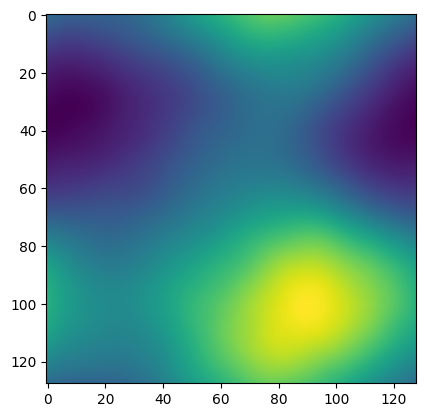

In [17]:
plt.imshow(signal_response_truth)

In [18]:
"""
import sys
import codecs
sys.stdout = codecs.getwriter("iso-8859-1")(sys.stdout, 'xmlcharrefreplace')

if sys.stdout.encoding != 'cp850':
  sys.stdout = codecs.getwriter('cp850')(sys.stdout.buffer, 'strict')
if sys.stderr.encoding != 'cp850':
  sys.stderr = codecs.getwriter('cp850')(sys.stderr.buffer, 'strict')
"""

'\nimport sys\nimport codecs\nsys.stdout = codecs.getwriter("iso-8859-1")(sys.stdout, \'xmlcharrefreplace\')\n\nif sys.stdout.encoding != \'cp850\':\n  sys.stdout = codecs.getwriter(\'cp850\')(sys.stdout.buffer, \'strict\')\nif sys.stderr.encoding != \'cp850\':\n  sys.stderr = codecs.getwriter(\'cp850\')(sys.stderr.buffer, \'strict\')\n'

In [19]:
"""
print(sys.stdout.encoding)
print u"Stöcker".encode(sys.stdout.encoding, errors='replace')
print u"Стоескер".encode(sys.stdout.encoding, errors='replace')
"""

'\nprint(sys.stdout.encoding)\nprint u"Stöcker".encode(sys.stdout.encoding, errors=\'replace\')\nprint u"Стоескер".encode(sys.stdout.encoding, errors=\'replace\')\n'

In [20]:
# n_vi_iterations = 6
# delta = 1e-4
# n_samples = 4

# key, k_i, k_o = jax.random.split(key, 3)
# # NOTE, changing the number of samples always triggers a resampling even if
# # `resamples=False`, as more samples have to be drawn that did not exist before.
# samples, state = jft.optimize_kl(
#     lh,
#     jft.Vector(lh.init(k_i)),
#     n_total_iterations=n_vi_iterations,
#     n_samples=lambda i: n_samples // 2 if i < 2 else n_samples,
#     # Source for the stochasticity for sampling
#     key=k_o,
#     # Names of parameters that should not be sampled but still optimized
#     # can be specified as point_estimates (effectively we are doing MAP for
#     # these degrees of freedom).
#     # point_estimates=("cfax1flexibility", "cfax1asperity"),
#     # Arguments for the conjugate gradient method used to drawing samples from
#     # an implicit covariance matrix
#     draw_linear_kwargs=dict(
#         cg_name="SL",
#         cg_kwargs=dict(absdelta=delta * jft.size(lh.domain) / 10.0, maxiter=100),
#     ),
#     # Arguements for the minimizer in the nonlinear updating of the samples
#     nonlinearly_update_kwargs=dict(
#         minimize_kwargs=dict(
#             name="SN",
#             xtol=delta,
#             cg_kwargs=dict(name=None),
#             maxiter=5,
#         )
#     ),
#     # Arguments for the minimizer of the KL-divergence cost potential
#     kl_kwargs=dict(
#         minimize_kwargs=dict(
#             name="M", xtol=delta, cg_kwargs=dict(name=None), maxiter=35
#         )
#     ),
#     sample_mode="nonlinear_resample",
#     odir="results_intro",
#     resume=False,
# )

In [21]:
# namps = cfm.get_normalized_amplitudes()
# post_sr_mean = jft.mean(tuple(signal(s) for s in samples))
# post_a_mean = jft.mean(tuple(cfm.amplitude(s)[1:] for s in samples))
# grid = correlated_field.target_grids[0]
# to_plot = [
#     ("Signal", signal(pos_truth), "im"),
#     ("Noise", noise_truth, "im"),
#     ("Data", data, "im"),
#     ("Reconstruction", post_sr_mean, "im"),
#     (
#         "Amplitude spectrum",
#         (
#             grid.harmonic_grid.mode_lengths[1:],
#             cfm.amplitude(pos_truth)[1:],
#             post_a_mean,
#         ),
#         "loglog",
#     ),
# ]
# fig, axs = plt.subplots(2, 3, figsize=(16, 9))
# for ax, v in zip(axs.flat, to_plot):
#     title, field, tp, *labels = v
#     ax.set_title(title)
#     if tp == "im":
#         end = tuple(n * d for n, d in zip(grid.shape, grid.distances))
#         im = ax.imshow(field.T, cmap="inferno", extent=(0.0, end[0], 0.0, end[1]))
#         plt.colorbar(im, ax=ax, orientation="horizontal")
#     else:
#         ax_plot = ax.loglog if tp == "loglog" else ax.plot
#         x = field[0]
#         for f in field[1:]:
#             ax_plot(x, f, alpha=0.7)
# for ax in axs.flat[len(to_plot) :]:
#     ax.set_axis_off()
# fig.tight_layout()
# fig.savefig("results_intro_full_reconstruction.png", dpi=400)
# plt.show()

# Imp

In [22]:
data = snp_data["High"]
data.shape

(1231,)

In [23]:
test_size = 0.05
n_train = int((1 - test_size) * data.shape[0])
train, test = data.iloc[:n_train], data.iloc[n_train:]
# train = train.to_numpy().reshape(1, -1)
# test = test.to_numpy().reshape(1, -1)
train, test = jnp.array(train), jnp.array(test)

assert train.shape[-1] + test.shape[-1] == data.shape[0]
train.shape, test.shape

((1169,), (62,))

In [24]:
key = jax.random.PRNGKey(SEED)
dims = train.shape
print(f"{dims=}")

cf_zm = dict(offset_mean=jnp.log(train.mean()), offset_std=(1.0, 2.0))
cf_fl = dict(
    fluctuations=(1.0, 2.0),
    loglogavgslope=(-1.0, 1e-1),
    flexibility=(1.0, 2.0),
    asperity=(1.0, 2.0),
)
cfm = jft.CorrelatedFieldMaker("cf")
cfm.set_amplitude_total_offset(**cf_zm)
cfm.add_fluctuations(
    tuple((xx * 2 for xx in dims)), distances=1.0 / (dims[0] * 2), **cf_fl, prefix="ax1", non_parametric_kind="power"
)
# power_s = cfm.power_spectrum
correlated_field = cfm.finalize()

dims=(1169,)


In [25]:
def find_field_names(field: jft.model.Model):
    return [k[:-2] for k in field.domain.keys() if k[-2:] == "xi"]

assert find_field_names(correlated_field)[0] == "cf"
assert len(find_field_names(correlated_field)) == 1

In [26]:
class SignalBase(jft.Model):
    def __init__(
        self, 
        correlated_field: jft.model.Model, 
        pad_left: int,
        pad_right: Optional[int] = None,
    ):
        self.cf = correlated_field
        self.pad_left = pad_left
        self.pad_right = pad_right if pad_right is not None else pad_left
        super().__init__(init=self.cf.init)

    def __call__(
        self, 
        x,
    ):
        res = jnp.exp(self.cf(x))
        res = res[self.pad_left:-self.pad_right]
        return res
        

# class SignalRes(jft.Model):
#     def __call__(self, x):
#         res = super().__call__(x)[self.data_size:]
#         return res


# class SignalRes(jft.Model):
#     def __call__(self, x):
#         res = super().__call__(x)[self.data_size:]
#         return res

In [27]:
signal = SignalBase(
    correlated_field, 
    # scaling,
    dims[0] // 2,
    dims[0] // 2 + 1,
)
signal_response = signal
noise_cov = lambda x: 0.1**2 * x
noise_cov_inv = lambda x: 0.1**-2 * x

# # Create synthetic data
# key, subkey = jax.random.split(key)
# pos_truth = jft.random_like(subkey, signal_response.domain)
# signal_response_truth = signal_response(pos_truth)
# key, subkey = jax.random.split(key)
# noise_truth = (
#     (noise_cov(jft.ones_like(signal_response.target))) ** 0.5
# ) * jft.random_like(key, signal_response.target)
# data = signal_response_truth + noise_truth

lh = jft.Gaussian(train, noise_cov_inv).amend(signal_response)

assuming a diagonal covariance matrix;
setting `std_inv` to `cov_inv(ones_like(data))**0.5`


In [66]:
n_vi_iterations = 6
n_vi_iterations = 10
delta = 1e-4
n_samples = 4
n_samples = 8

key, k_i, k_o = jax.random.split(key, 3)
# NOTE, changing the number of samples always triggers a resampling even if
# `resamples=False`, as more samples have to be drawn that did not exist before.
samples, state = jft.optimize_kl(
    lh,
    jft.Vector(lh.init(k_i)),
    n_total_iterations=n_vi_iterations,
    n_samples=lambda i: n_samples // 2 if i < 2 else n_samples,
    # Source for the stochasticity for sampling
    key=k_o,
    # Names of parameters that should not be sampled but still optimized
    # can be specified as point_estimates (effectively we are doing MAP for
    # these degrees of freedom).
    # point_estimates=("cfax1flexibility", "cfax1asperity"),
    # Arguments for the conjugate gradient method used to drawing samples from
    # an implicit covariance matrix
    draw_linear_kwargs=dict(
        cg_name="SL",
        cg_kwargs=dict(absdelta=delta * jft.size(lh.domain) / 10.0, maxiter=100),
    ),
    # Arguements for the minimizer in the nonlinear updating of the samples
    nonlinearly_update_kwargs=dict(
        minimize_kwargs=dict(
            name="SN",
            xtol=delta,
            cg_kwargs=dict(name=None),
            maxiter=5,
        )
    ),
    # Arguments for the minimizer of the KL-divergence cost potential
    kl_kwargs=dict(
        minimize_kwargs=dict(
            name="M", xtol=delta, cg_kwargs=dict(name=None), maxiter=35
        )
    ),
    sample_mode="nonlinear_resample",
    odir="results_intro",
    resume=False,
)

OPTIMIZE_KL: Starting 0001
SL: Iteration 0 ⛰:+8.4900e+10 Δ⛰:inf ➽:4.6790e-02
SL: Iteration 1 ⛰:+5.0849e+10 Δ⛰:3.4051e+10 ➽:4.6790e-02
SL: Iteration 2 ⛰:+4.8015e+10 Δ⛰:2.8339e+09 ➽:4.6790e-02
SL: Iteration 3 ⛰:+2.9195e+10 Δ⛰:1.8820e+10 ➽:4.6790e-02
SL: Iteration 4 ⛰:+2.1738e+10 Δ⛰:7.4567e+09 ➽:4.6790e-02
SL: Iteration 5 ⛰:+1.7232e+10 Δ⛰:4.5059e+09 ➽:4.6790e-02
SL: Iteration 6 ⛰:+1.4966e+10 Δ⛰:2.2666e+09 ➽:4.6790e-02
SL: Iteration 7 ⛰:+1.2124e+10 Δ⛰:2.8420e+09 ➽:4.6790e-02
SL: Iteration 8 ⛰:+9.8643e+09 Δ⛰:2.2596e+09 ➽:4.6790e-02
SL: Iteration 9 ⛰:+9.8373e+09 Δ⛰:2.7065e+07 ➽:4.6790e-02
SL: Iteration 10 ⛰:+7.7131e+09 Δ⛰:2.1241e+09 ➽:4.6790e-02
SL: Iteration 11 ⛰:+7.6726e+09 Δ⛰:4.0584e+07 ➽:4.6790e-02
SL: Iteration 12 ⛰:+6.2791e+09 Δ⛰:1.3935e+09 ➽:4.6790e-02
SL: Iteration 13 ⛰:+5.2075e+09 Δ⛰:1.0715e+09 ➽:4.6790e-02
SL: Iteration 14 ⛰:+4.0734e+09 Δ⛰:1.1341e+09 ➽:4.6790e-02
SL: Iteration 15 ⛰:+3.3748e+09 Δ⛰:6.9857e+08 ➽:4.6790e-02
SL: Iteration 16 ⛰:+2.8158e+09 Δ⛰:5.5903e+08 ➽:4.6790e-02
SL: 

In [68]:
mean_samps_as_train = jft.mean(tuple(signal(s) for s in samples))
mean_samps_all = jft.mean(tuple(jnp.exp(signal.cf(s))[(dims[0] // 2):-400] for s in samples))

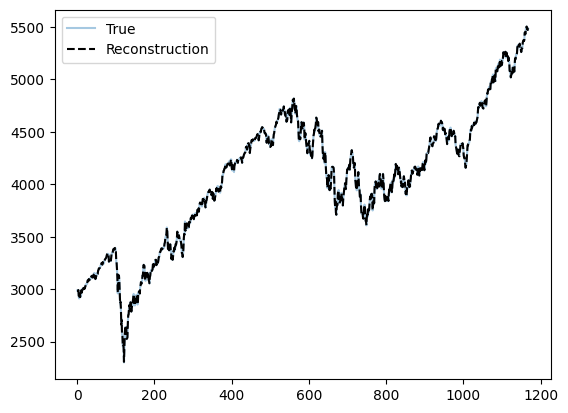

In [69]:
fig = plt.figure()
plt.plot(train, alpha=0.4, label="True")
plt.plot(signal(samples[0]), "--k", label="Reconstruction")
plt.legend()
plt.show()

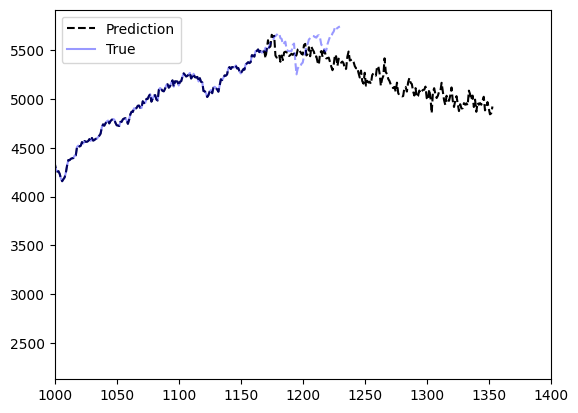

In [70]:
fig = plt.figure()
# plt.plot(jnp.exp(signal.cf(samples[2]))[(dims[0] // 2):-400], "--k", label="Prediction")
plt.plot(mean_samps_all, "--k", label="Prediction")
# plt.plot(data.to_numpy(), alpha=0.4, label="True")
plt.plot(jnp.arange(train.shape[0]), train, "b", alpha=0.4, label="True")
plt.plot(jnp.arange(train.shape[0], train.shape[0] + test.shape[0]), test, "--b", alpha=0.4)
plt.xlim(1000, 1400)
plt.legend(loc="upper left")
plt.show()

In [ ]:
namps = cfm.get_normalized_amplitudes()
post_sr_mean = jft.mean(tuple(signal(s) for s in samples))
post_a_mean = jft.mean(tuple(cfm.amplitude(s)[1:] for s in samples))
grid = correlated_field.target_grids[0]
to_plot = [
    ("Signal", signal(pos_truth), "im"),
    ("Noise", noise_truth, "im"),
    ("Data", data, "im"),
    ("Reconstruction", post_sr_mean, "im"),
    (
        "Amplitude spectrum",
        (
            grid.harmonic_grid.mode_lengths[1:],
            cfm.amplitude(pos_truth)[1:],
            post_a_mean,
        ),
        "loglog",
    ),
]
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
for ax, v in zip(axs.flat, to_plot):
    title, field, tp, *labels = v
    ax.set_title(title)
    if tp == "im":
        end = tuple(n * d for n, d in zip(grid.shape, grid.distances))
        im = ax.imshow(field.T, cmap="inferno", extent=(0.0, end[0], 0.0, end[1]))
        plt.colorbar(im, ax=ax, orientation="horizontal")
    else:
        ax_plot = ax.loglog if tp == "loglog" else ax.plot
        x = field[0]
        for f in field[1:]:
            ax_plot(x, f, alpha=0.7)
for ax in axs.flat[len(to_plot) :]:
    ax.set_axis_off()
fig.tight_layout()
fig.savefig("results_intro_full_reconstruction.png", dpi=400)
plt.show()

In [ ]:
n = -1
plt.plot(ftse_data.High.iloc[-n:], label="ftse")
plt.plot(snp_data.High.iloc[-n:], label="snp")
plt.legend()
plt.show()